<center><h1>Bai_Xiao_HW2</h1></center>
<br>
<br>

Name: Xiao Bai
<br>
Github Username: XiaoBai-blip
<br>
USC ID: 1862548450

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

Get the Cycle Power Plant Data Set

In [29]:
file_path = 'Folds5x2_pp.xlsx' 
df = pd.read_excel(file_path)
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


### (b) Exploring the data

#### i. rows and columns

In [3]:
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 9568
Number of columns: 5


From the output we can see there are 5 columns and 9468 rows in the data. The five columns represent ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V), and the predicted varaible net hourly electrical energy output (PE) of the plant. Each row represents an hourly observation that was recorded over 6 years when the power plant operated at full load.

#### ii. pairwise scatterplots of all the varianbles

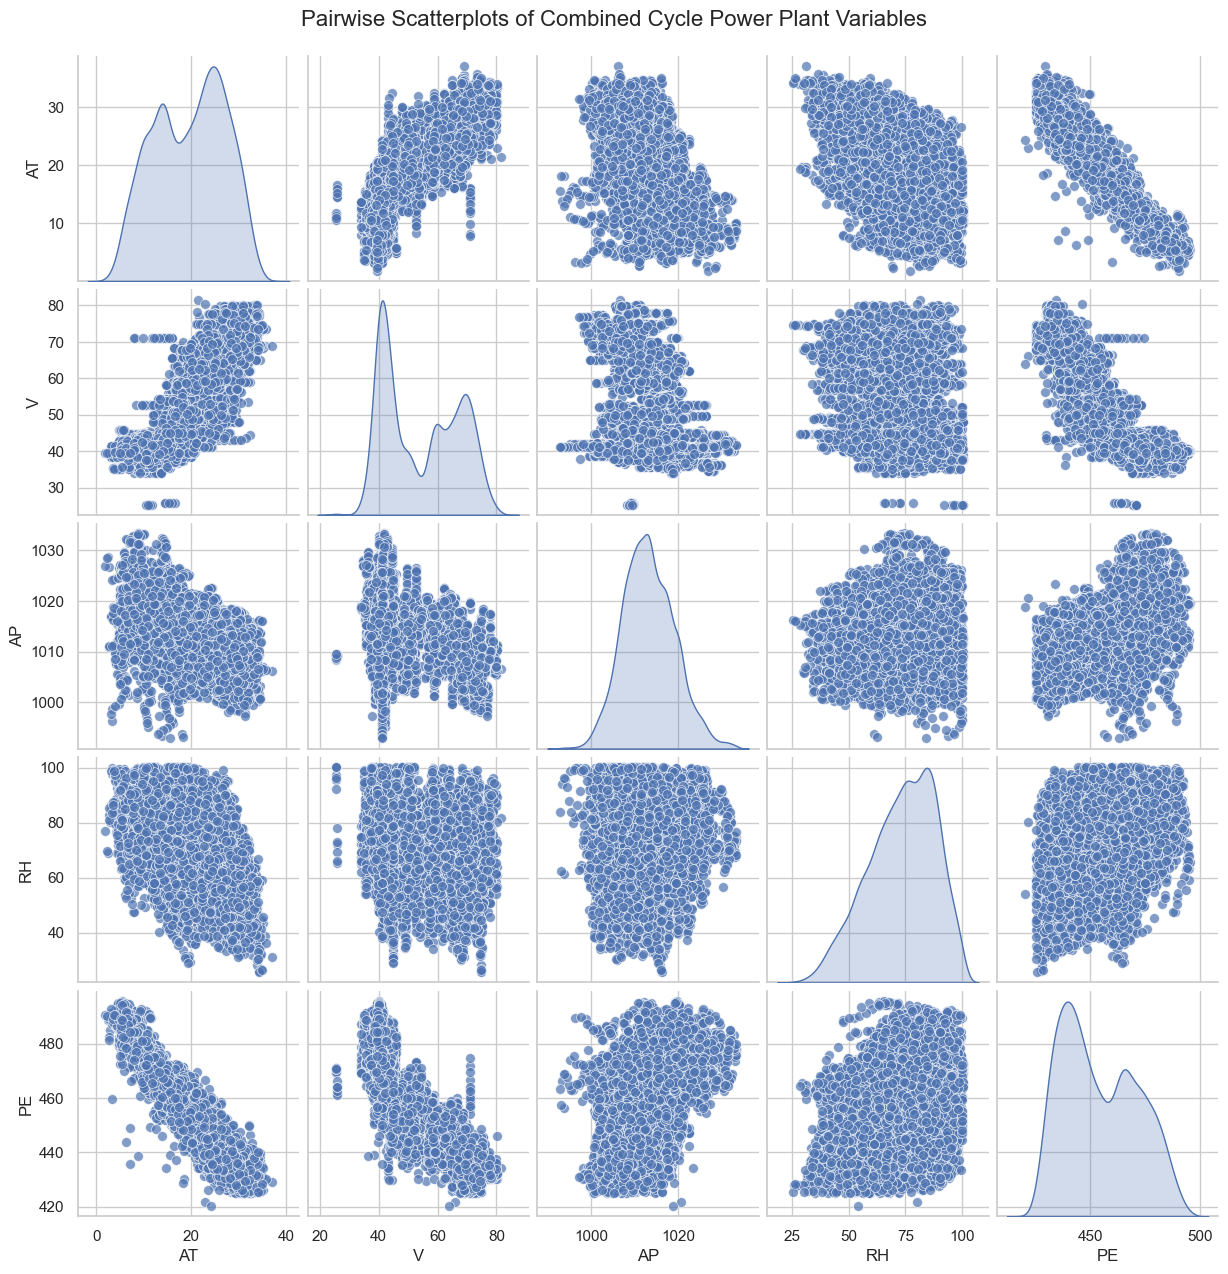

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set_theme(style="whitegrid", context="notebook")


pairplot = sns.pairplot(
    df,
    diag_kind="kde",            
    markers="o",                
    plot_kws={"s": 50, "alpha": 0.7},  
    diag_kws={"shade": True}    
)


pairplot.fig.suptitle("Pairwise Scatterplots of Combined Cycle Power Plant Variables", y=1.02, fontsize=16)
plt.show()

For scatterplots about predictors (RH, V, AP, AT) with the dependent variable (PE), we can see:
1. PE vs. Temperature (T): There is a positive trend; as temperature increases, the electrical power output (PE) tends to increase.
2. PE vs. Exhaust Vacuum (V): A strong positive correlation is visible, it suggest that higher exhaust vacuum values are associated with higher PE.
3. PE vs. Ambient Pressure (AP): There appears to be a moderate positive relationship.
4. PE vs. Relative Humidity (RH): The scatterplot indicates a negative relationship; higher relative humidity is generally associated with lower PE
For relationships between independent variables, we can see some predictors, such as Temperature and Exhaust Vacuum, show moderate intercorrelations, which may be important to consider during modeling.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
stats_variables = df.describe().T

# the range and IQR for each variable
stats_variables['range'] = stats_variables['max'] - stats_variables['min']
stats_variables['IQR'] = stats_variables['75%'] - stats_variables['25%']

stats_variables = stats_variables.rename(columns={'50%': 'median'})
table = stats_variables[['mean', 'median', 'min', 'max', 'range', '25%', '75%', 'IQR']]

table = table.rename(columns={
    'min': 'Min',
    'max': 'Max',
    '25%': 'Q1',
    '75%': 'Q3'
})

# the summary table
table


,mean,median,Min,Max,range,Q1,Q3,IQR
AT,19.651231,20.345,1.81,37.11,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,25.36,81.56,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,992.89,1033.30,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,25.56,100.16,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,420.26,495.76,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:18:45   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

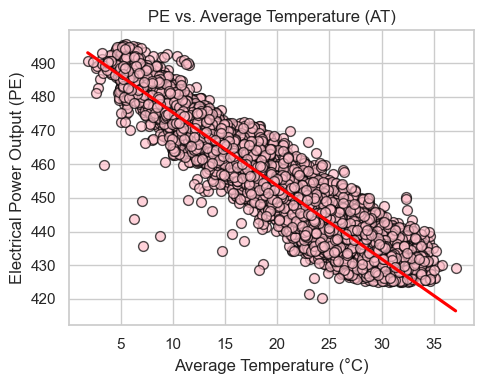

In [6]:
# PE ~ AT
model_T = smf.ols(formula="PE ~ AT", data=df).fit()
print(model_T.summary())

# Create a smaller scatterplot with regression line for Temperature
plt.figure(figsize=(5, 4))
sns.regplot(
    x="AT", y="PE", data=df,
    scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'pink', 'edgecolor': 'black'},
    line_kws={'color': 'red'}
)
plt.title("PE vs. Average Temperature (AT)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Electrical Power Output (PE)")
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:18:46   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

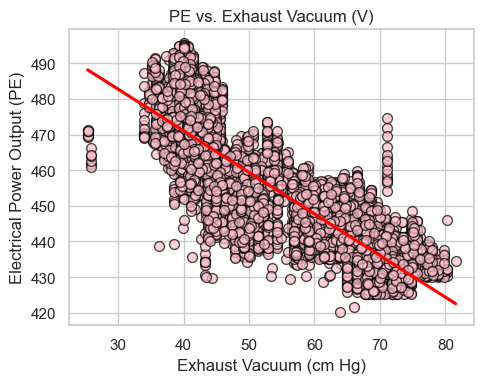

In [7]:
# PE ~ V
model_V = smf.ols(formula="PE ~ V", data=df).fit()
print(model_V.summary())

# Create a smaller scatterplot with regression line for Exhaust Vacuum
plt.figure(figsize=(5, 4))
sns.regplot(
    x="V", y="PE", data=df,
    scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'pink', 'edgecolor': 'black'},
    line_kws={'color': 'red'}
)
plt.title("PE vs. Exhaust Vacuum (V)")
plt.xlabel("Exhaust Vacuum (cm Hg)")
plt.ylabel("Electrical Power Output (PE)")
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:18:46   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

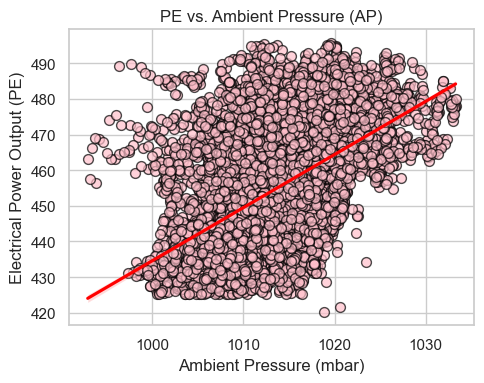

In [8]:
# PE ~ AP
model_AP = smf.ols(formula="PE ~ AP", data=df).fit()
print(model_AP.summary())

# create a smaller scatterplot with regression line for Ambient Pressure
plt.figure(figsize=(5, 4))
sns.regplot(
    x="AP", y="PE", data=df,
    scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'pink', 'edgecolor': 'black'},
    line_kws={'color': 'red'}
)
plt.title("PE vs. Ambient Pressure (AP)")
plt.xlabel("Ambient Pressure (mbar)")
plt.ylabel("Electrical Power Output (PE)")
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:18:46   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

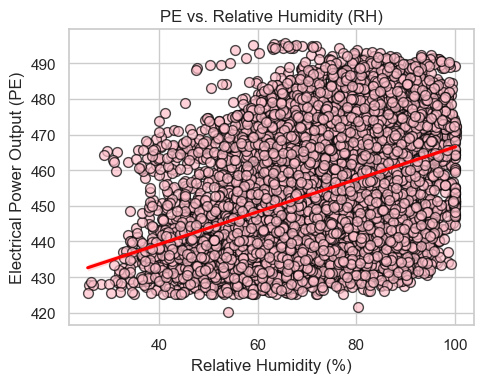

In [9]:
# PE ~ RH
model_RH = smf.ols(formula="PE ~ RH", data=df).fit()
print(model_RH.summary())

# create a smaller scatterplot with regression line for Relative Humidity
plt.figure(figsize=(5, 4))
sns.regplot(
    x="RH", y="PE", data=df,
    scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'pink', 'edgecolor': 'black'},
    line_kws={'color': 'red'}
)
plt.title("PE vs. Relative Humidity (RH)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Electrical Power Output (PE)")
plt.tight_layout()
plt.show()

From the four regression result tables as well as their correlation plots, we can see that:
- The model PE ~ AT shows a statistically significant positive relationship (p-value < 0.05), meaning as temperature increases, the electrical power output tends to increase. And the scatterplot with regression line confirms this trend.
- The model PE ~ V exhibits a strong, statistically significant relationship (p-value < 0.05). A change in vacuum is strongly associated with a change in EP. From the plot, the corresponding plot shows a tight clustering of points around the regression line.
- The model PE ~ AP shows a statistically significant association, but the strength (coefficient and R-squared) might be lower compared to AT or V. The scatterplot reveal a moderate positive trend.
- The model PE ~ RH displays a statistically significant negative association (p-value < 0.05), indicating that higher humidity is linked to lower power output. We can observe from the plot that this plot confirms this downward trend.

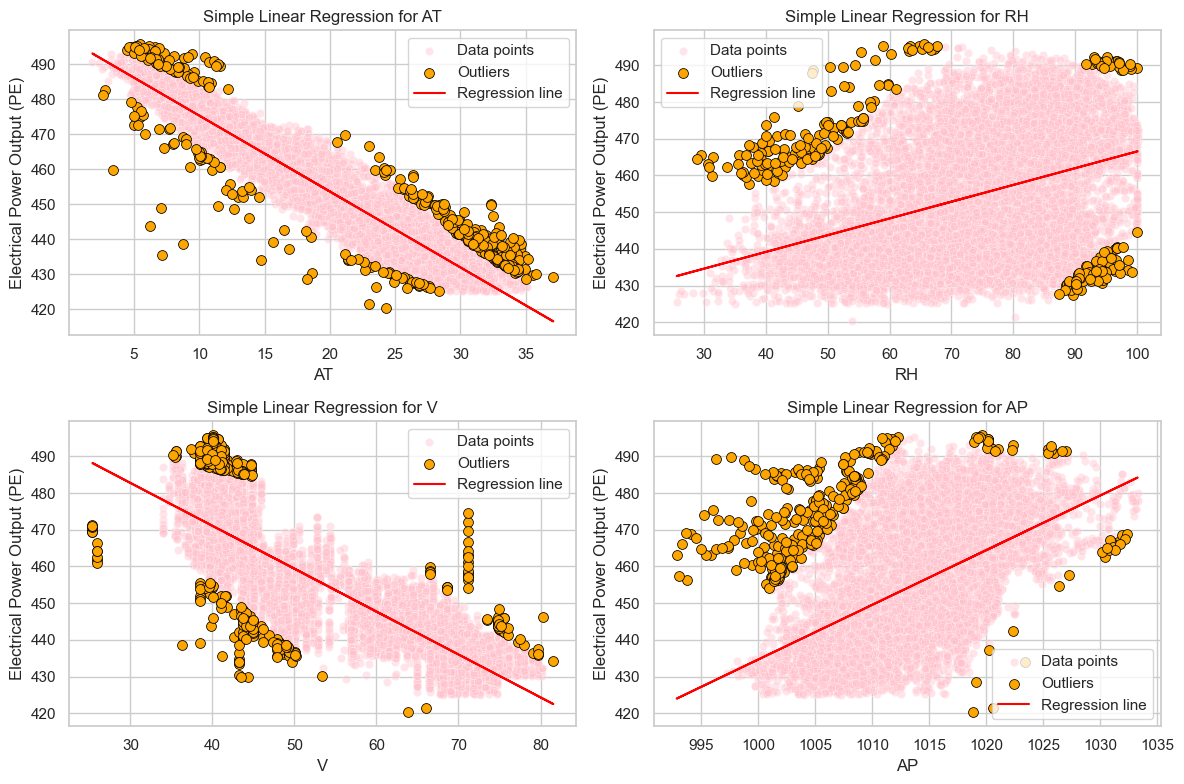

In [10]:
def plot_regression_with_outliers(variable, df):
    # PE ~ variable
    formula = f"PE ~ {variable}"
    model = smf.ols(formula=formula, data=df).fit()

    # Predict the regression line values
    y_pred = model.predict(df)

    # Calculate Cook's distance
    n = len(df)  # Number of observations
    influence = model.get_influence()
    (cooks_d, _) = influence.cooks_distance
    threshold = 4 / n

    
    outlier_indices = np.where(cooks_d > threshold)[0]

    # scatterplot with highlighted outliers
    sns.scatterplot(x=df[variable], y=df["PE"], color='pink', alpha=0.4, label="Data points")
    sns.scatterplot(x=df[variable].iloc[outlier_indices], y=df["PE"].iloc[outlier_indices], 
                    color='orange', edgecolor='black', label="Outliers", s=50)
    plt.plot(df[variable], y_pred, color='red', label="Regression line")

    plt.title(f"Simple Linear Regression for {variable}")
    plt.xlabel(variable)
    plt.ylabel("Electrical Power Output (PE)")
    plt.legend()


variables = ["AT", "RH", "V", "AP"]


plt.figure(figsize=(12, 8))  
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 2, i)  
    plot_regression_with_outliers(variable, df)
    plt.tight_layout()

plt.show()

I identified outliers based on Cook's Distance with a threshold is set to 4/n, it highlights potential outliers that may influence further investigation. As from four plots, the orange dots are considered outliers and can be removed

### (d) Multiple Regression

In [11]:
model_multiple = smf.ols(formula="PE ~ AT + RH + V + AP", data=df).fit()

print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:18:48   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

Based on the multiple linear regression results, the model shows a strong fit with an R squared value of 0.929, indicating that 92.9% of the variance in the dependent variable (PE) is explained by the predictors. All predictors have statistically significant coefficients, as evidenced by their p-values being less than 0.05. Specifically, AT has a negative coefficient of -1.9775, suggesting that for every 1°C increase in AT, PE decreases by approximately 1.98 units, holding other variables constant. Similarly, RH and V also have negative impacts on PE, with coefficients of -0.1581 and -0.2339, respectively. In contrast, AP has a positive coefficient of 0.0621, indicating that higher ambient pressure leads to a slight increase in PE. The model's overall significance is confirmed by the F-statistic (3.114e+04) and its associated p-value (0.000). This indicates that the predictors collectively explain the response variable significantly well. In this regression model, we can reject the null hypothesis for all the predictors (AT, RH, V, and AP) because their p-values are all less than 0.05. This indicates that all these predictors have a statistically significant effect on the response variable (PE) at the 5% significance level.

### (e) 1c Compare to 1d

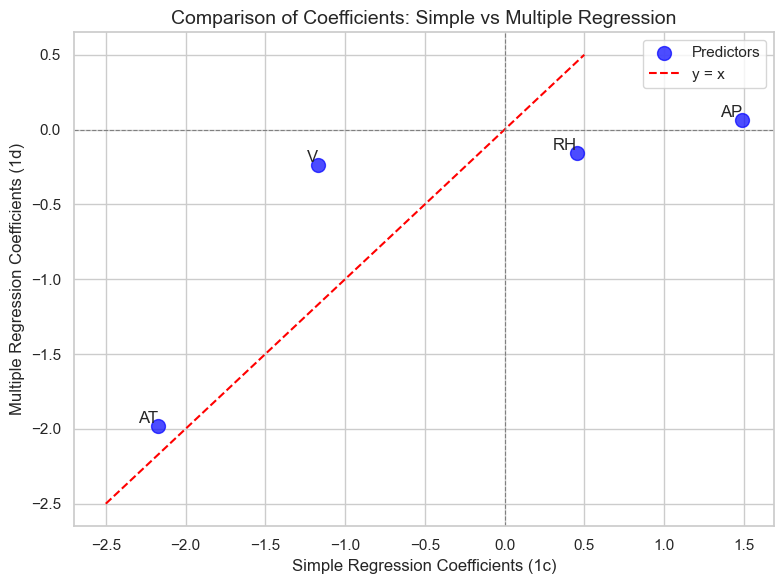

In [12]:
# coefficients from simple linear regression
simple_regression_coeffs = {
    "AT": -2.1713,  
    "RH": 0.4557,
    "V": -1.1681,
    "AP": 1.4899 
}

# coefficients from multiple regression
multiple_regression_coeffs = {
    "AT": -1.9775,  
    "RH": -0.1581,
    "V": -0.2339,
    "AP": 0.0621
}


predictors = list(simple_regression_coeffs.keys())
x = [simple_regression_coeffs[p] for p in predictors]
y = [multiple_regression_coeffs[p] for p in predictors]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", s=100, alpha=0.7, label="Predictors")
for i, predictor in enumerate(predictors):
    plt.text(x[i], y[i], predictor, fontsize=12, ha="right", va="bottom")

plt.plot([-2.5, 0.5], [-2.5, 0.5], color="red", linestyle="--", label="y = x")

plt.title("Comparison of Coefficients: Simple vs Multiple Regression", fontsize=14)
plt.xlabel("Simple Regression Coefficients (1c)", fontsize=12)
plt.ylabel("Multiple Regression Coefficients (1d)", fontsize=12)
plt.axhline(0, color="grey", linestyle="--", linewidth=0.8)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()


Most of the predictors are pretty close to the diagonal line, which means their effects don’t change much when we look at them individually versus together. The only one that stands out a bit is V, whose impact slightly decreases in the multiple regression, likely because it overlaps a little with other predictors. Similar as AP point. Overall, the predictors seem to work pretty independently, which is why the coefficients are so similar.

### (f) Nonlinear Association

In [13]:
def fit_nonlinear_model(df, predictor):

    
    formula = f"PE ~ {predictor} + I({predictor}**2) + I({predictor}**3)"
    model = smf.ols(formula=formula, data=df).fit()
    print(f"Nonlinear Model Summary for {predictor}:\n")
    print(model.summary())
    return model


predictors = ["AT", "RH", "V", "AP"]
models = {}

for predictor in predictors:
    print("-" * 80)
    models[predictor] = fit_nonlinear_model(df, predictor)


--------------------------------------------------------------------------------
Nonlinear Model Summary for AT:

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:18:48   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

There is evidence of nonlinear association between any of the predictors and the response if the p-value for X^2 and X^3 is < 0.05. So from the summary table, there appears to be some evidence of non-linear association of AT, RH, AP with PE as they all have p-value smaller than 0.05

### (g) Interactions of Predictors

In [14]:
interaction_formula = "PE ~ AT * RH + AT * V + AT * AP + RH * V + RH * AP + V * AP"

interaction_model = smf.ols(formula=interaction_formula, data=df).fit()

print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:18:48   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

From the interaction model, some interaction terms are statistically significant because their p-values are less than 0.05. These include AT:RH, AT:V, RH:AP, and V:AP, which means the effect of one predictor on PE depends on the value of the other in these pairs. However, interaction terms like AT:AP (p=0.452) and RH:V (p=0.086) are not significant, so no strong combined effect for those pairs on the response.

### (h) Improvement

In [15]:
# split the data into training and testing
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)


full_formula = ("PE ~ AT + RH + V + AP + "
                "I(AT**2) + I(RH**2) + I(V**2) + I(AP**2) + "
                "AT:RH + AT:V + AT:AP + RH:V + RH:AP + V:AP")

full_model = smf.ols(formula=full_formula, data=train_df).fit()



print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:18:48   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7664.9809   1429.568     -5.362      0.0

In [16]:
# remove terms that have p-value larger than 0.05 as they are not significant, and build a new refined model
significant_formula = ("PE ~ AT + RH + V + AP + "
                "I(AT**2) + I(RH**2) + I(AP**2) + "
                "AT:RH + AT:V + RH:AP")  


refined_model = smf.ols(formula=significant_formula, data=train_df).fit()
print(refined_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:18:48   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.046e+04   1091.512     -9.581      0.0

In [17]:
train_full_preds = full_model.predict(train_df)
train_refined_preds = refined_model.predict(train_df)

train_full_mse = mean_squared_error(train_df["PE"], train_full_preds)
train_refined_mse = mean_squared_error(train_df["PE"], train_refined_preds)

# Predict and calculate MSE for both models on the testing set
test_full_preds = full_model.predict(test_df)
test_refined_preds = refined_model.predict(test_df)

test_full_mse = mean_squared_error(test_df["PE"], test_full_preds)
test_refined_mse = mean_squared_error(test_df["PE"], test_refined_preds)

print("Train MSE (Full Model):", train_full_mse)
print("Train MSE (Refined Model):", train_refined_mse)
print("Test MSE (Full Model):", test_full_mse)
print("Test MSE (Refined Model):", test_refined_mse)

Train MSE (Full Model): 17.88779961663339
Train MSE (Refined Model): 17.917812671185523
Test MSE (Full Model): 18.647312478578822
Test MSE (Refined Model): 18.694346190799774


### (i) KNN

In [18]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)


X_train = train_df.drop(columns=["PE"])
y_train = train_df["PE"]
X_test = test_df.drop(columns=["PE"])
y_test = test_df["PE"]

# normalize features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [19]:
train_errors_raw = []
test_errors_raw = []
train_errors_normalized = []
test_errors_normalized = []
k_values = range(1, 101)
for k in k_values:
    
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    train_preds_raw = knn_raw.predict(X_train)
    test_preds_raw = knn_raw.predict(X_test)
    train_errors_raw.append(mean_squared_error(y_train, train_preds_raw))
    test_errors_raw.append(mean_squared_error(y_test, test_preds_raw))
    
    
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_normalized.fit(X_train_normalized, y_train)
    train_preds_normalized = knn_normalized.predict(X_train_normalized)
    test_preds_normalized = knn_normalized.predict(X_test_normalized)
    train_errors_normalized.append(mean_squared_error(y_train, train_preds_normalized))
    test_errors_normalized.append(mean_squared_error(y_test, test_preds_normalized))

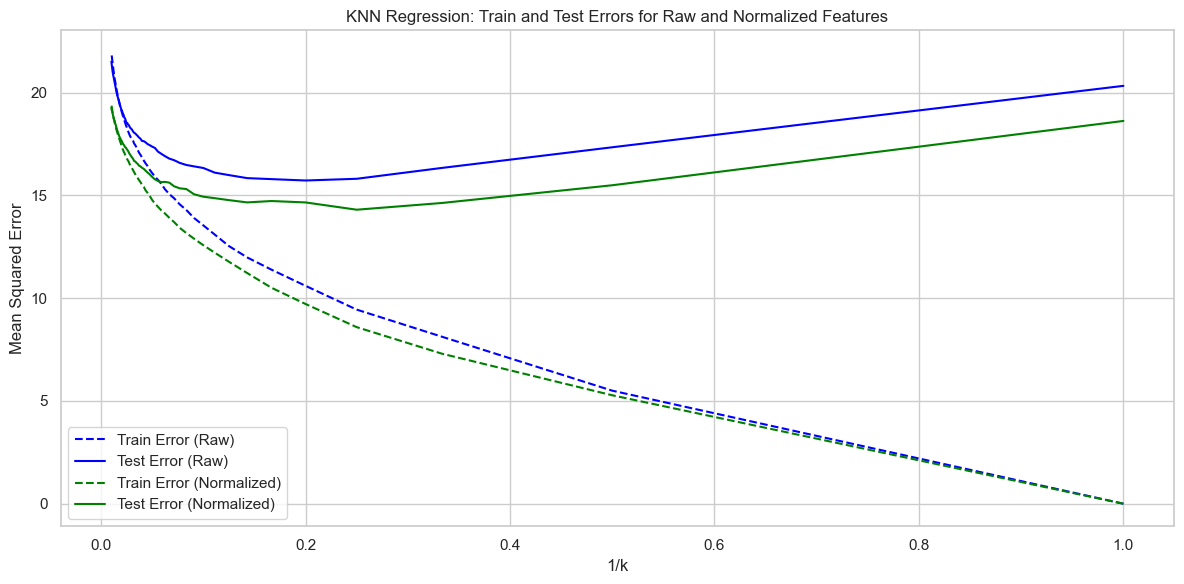

In [20]:
# train and test errors for raw and normalized features
plt.figure(figsize=(12, 6))

# plot for raw features
plt.plot(1/np.array(k_values), train_errors_raw, label="Train Error (Raw)", color="blue", linestyle="--")
plt.plot(1/np.array(k_values), test_errors_raw, label="Test Error (Raw)", color="blue")

# for normalized features
plt.plot(1/np.array(k_values), train_errors_normalized, label="Train Error (Normalized)", color="green", linestyle="--")
plt.plot(1/np.array(k_values), test_errors_normalized, label="Test Error (Normalized)", color="green")


plt.xlabel("1/k")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression: Train and Test Errors for Raw and Normalized Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### (j ) Compare KNN and Linear

In [21]:
model_multiple = smf.ols(formula="PE ~ AT + RH + V + AP", data=df).fit()

train_preds_multiple = model_multiple.predict(train_df)
test_preds_multiple = model_multiple.predict(test_df)

train_mse_multiple = mean_squared_error(train_df["PE"], train_preds_multiple)
test_mse_multiple = mean_squared_error(test_df["PE"], test_preds_multiple)

print(f"Train MSE (Multiple Regression): {train_mse_multiple:.2f}")
print(f"Test MSE (Multiple Regression): {test_mse_multiple:.2f}")


Train MSE (Multiple Regression): 20.59
Test MSE (Multiple Regression): 21.18


In [22]:
full_formula = (
    "PE ~ AT + RH + V + AP + "
    "I(AT**2) + I(RH**2) + I(V**2) + I(AP**2) + "
    "AT:RH + AT:V + AT:AP + RH:V + RH:AP + V:AP"
)
full_model = smf.ols(formula=full_formula, data=train_df).fit()



# train and test predictions for the full model
train_preds_full = full_model.predict(train_df)
test_preds_full = full_model.predict(test_df)

train_mse_full = mean_squared_error(train_df["PE"], train_preds_full)
test_mse_full = mean_squared_error(test_df["PE"], test_preds_full)

print(f"Train MSE (Full Model): {train_mse_full:.2f}")
print(f"Test MSE (Full Model): {test_mse_full:.2f}")

Train MSE (Full Model): 17.89
Test MSE (Full Model): 18.65


In [23]:
significant_formula = (
    "PE ~ AT + RH + V + AP + "
    "I(AT**2) + I(RH**2) + I(AP**2) + "
    "AT:RH + AT:V + RH:AP"
)
refined_model = smf.ols(formula=significant_formula, data=train_df).fit()


# train and test predictions for the refined model
train_preds_refined = refined_model.predict(train_df)
test_preds_refined = refined_model.predict(test_df)

train_mse_refined = mean_squared_error(train_df["PE"], train_preds_refined)
test_mse_refined = mean_squared_error(test_df["PE"], test_preds_refined)

print(f"Train MSE (Refined Model): {train_mse_refined:.2f}")
print(f"Test MSE (Refined Model): {test_mse_refined:.2f}")


Train MSE (Refined Model): 17.92
Test MSE (Refined Model): 18.69


In [24]:
# calculate the train and test MSE for the best k values for knn regression

best_k_raw = k_values[np.argmin(test_errors_raw)]
best_k_normalized = k_values[np.argmin(test_errors_normalized)]

# train KNN models for the best k values
knn_best_raw = KNeighborsRegressor(n_neighbors=best_k_raw)
knn_best_raw.fit(X_train, y_train)
train_mse_knn_raw = mean_squared_error(y_train, knn_best_raw.predict(X_train))
test_mse_knn_raw = mean_squared_error(y_test, knn_best_raw.predict(X_test))

knn_best_normalized = KNeighborsRegressor(n_neighbors=best_k_normalized)
knn_best_normalized.fit(X_train_normalized, y_train)
train_mse_knn_normalized = mean_squared_error(y_train, knn_best_normalized.predict(X_train_normalized))
test_mse_knn_normalized = mean_squared_error(y_test, knn_best_normalized.predict(X_test_normalized))


knn_results = {
    "Model": ["KNN Regression (Raw)", "KNN Regression (Normalized)"],
    "Train MSE": [train_mse_knn_raw, train_mse_knn_normalized],
    "Test MSE": [test_mse_knn_raw, test_mse_knn_normalized],
}

knn_mse_table_final = pd.DataFrame(knn_results)
knn_mse_table_final


,Model,Train MSE,Test MSE
0,KNN Regression (Raw),10.600769,15.726820
1,KNN Regression (Normalized),8.591433,14.305669


In [25]:
mse_data = {
    "Model": ["Multiple Regression", "Full Model", "Refined Model"],
    "Train MSE": [train_mse_multiple, train_mse_full, train_mse_refined],
    "Test MSE": [test_mse_multiple, test_mse_full, test_mse_refined],
}

mse_table = pd.DataFrame(mse_data)
mse_table

,Model,Train MSE,Test MSE
0,Multiple Regression,20.592037,21.176449
1,Full Model,17.887800,18.647312
2,Refined Model,17.917813,18.694346


From the above two tables for linear regression model's mse and knn regression model's mse we can see that KNN Regression with normalized features performs the best, achieving the lowest train MSE (8.59) and test MSE (14.31). It shows that how scaling features makes a big difference for distance-based models. The Full Model and Refined Model in linear regression perform similarly, with test MSEs of 18.65 and 18.69, which are better than the simpler Multiple Regression (21.18). KNN does a better job at capturing the non-linear relationships in the data, while linear regression is more interpretable but struggles a bit with the dataset’s complexity.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

The flexible method is better because when the sample size is large, flexible methods can capture more complex relationships without overfitting because there is enough data to estimate the model parameters accurately. And since p is small, there is less risk of overfitting.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

The flexible method is worse because flexible methods tend to overfit when there are many predictors than the number of observations because they require more data to accurately estimate the parameters.

### (c) The relationship between the predictors and response is highly non-linear.

The flexible method is better because flexible methods are better for capturing complex, non-linear relationships as they can adapt to the underlying structure of the data, making them more effective in this case.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

The flexible method is worse because higher variance in the error terms increases the risk of overfitting for flexible methods, as they may capture the noise in the data rather than their true relationship.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [26]:
observations = np.array([
    [0, 3, 0],  
    [2, 0, 0],  
    [0, 1, 3],  
    [0, 1, 2],  
    [-1, 0, 1], 
    [1, 1, 1]   
])

# when X1 = X2 = X3 = 0
test_point = np.array([0, 0, 0])

distances = np.sqrt(np.sum((observations - test_point) ** 2, axis=1))

distance_table = pd.DataFrame({
    "Observation": [1, 2, 3, 4, 5, 6],
    "Distance": distances
})
print(distance_table)

   Observation  Distance
0            1  3.000000
1            2  2.000000
2            3  3.162278
3            4  2.236068
4            5  1.414214
5            6  1.732051


### (b) What is our prediction with K = 1? Why?

Our prediction with K = 1 is Obs 5, with a distance of 1.41, and its label is Green.
Because When K=1, the prediction will be based on the closest data point, so the model predicts the same class as its closest neighbor, which is obs5x

### (c) What is our prediction with K = 3? Why?

Our prediction with K = 3 include the data point: Obs 5 (1.41, Green), Obs 6 (1.73, Red) and Obs 2 (2.00, Red). And the prediction will be Red, because among the 3 nearest neighbors, 2 are Red and 1 is Green. For K=3, the prediction is made by majority vote among the 3 nearest neighbors.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

We expect the best value for K to be small because a highly non-linear decision boundary needs the model to be more flexible, and using a smaller K helps with that. Smaller K values let the model focus on local patterns and adjust to the complexity of the boundary

# References

https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/
https://developer.nvidia.com/blog/a-comprehensive-guide-to-interaction-terms-in-linear-regression/
https://www.w3schools.com/python/python_ml_multiple_regression.asp
https://medium.com/@nandiniverma78988/understanding-k-nearest-neighbors-knn-regression-in-machine-learning-c751a7cf516c
https://harvard-iacs.github.io/2021-CS109A/lectures/lecture03/notebook-3/
chatgpt was used for assisstant